In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# paths
qwen_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/qwen3-4b-kilns_lat_lon_appearance_year.csv"
gt_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/images_753_with_Year_Categories.csv"

# load
qwen = pd.read_csv(qwen_path)
gt = pd.read_csv(gt_path)

# round lat/lon for safe matching
qwen["lat"] = qwen["lat"].round(6)
qwen["lon"] = qwen["lon"].round(6)

# extract lat/lon from filename
gt[["lat", "lon"]] = gt["filename"].str.replace(".png", "", regex=False).str.split("_", expand=True)
gt["lat"] = gt["lat"].astype(float).round(6)
gt["lon"] = gt["lon"].astype(float).round(6)

In [2]:
merged = pd.merge(
    gt,
    qwen,
    on=["lat", "lon"],
    how="inner",
    suffixes=("_gt", "_pred")
)

print("Matched samples:", len(merged))

Matched samples: 753


In [3]:
y_true = merged["appearance_year_gt"].astype(int)
y_pred = merged["appearance_year_pred"].astype(int)

labels = sorted(set(y_true) | set(y_pred))

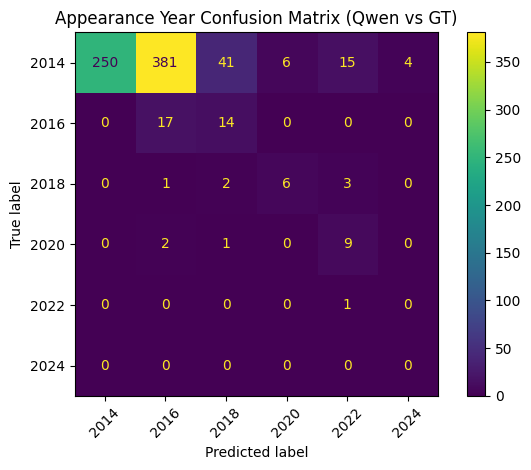

In [4]:
cm = confusion_matrix(y_true, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Appearance Year Confusion Matrix (Qwen vs GT)")
plt.tight_layout()
plt.show()

In [5]:
merged[[
    "lat", "lon",
    "appearance_year_gt",
    "appearance_year_pred",
    "confidence",
    "status"
]].to_csv("appearance_year_matched_for_cm.csv", index=False)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(
    merged["appearance_year_gt"].astype(int),
    merged["appearance_year_pred"].astype(int)
)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3586


In [9]:
import pandas as pd

# input and output paths
inp = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/vlm_kiln_appearance_results_gemini.csv"
out = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/gemini_lat_lon_appearance_year.csv"

# load
df = pd.read_csv(inp)

# split lat_lon into lat and lon
df[["lat", "lon"]] = df["lat_lon"].str.split("_", expand=True)

# type cast
df["lat"] = df["lat"].astype(float)
df["lon"] = df["lon"].astype(float)
df["appearance_year"] = df["appearance_year"].fillna(0).astype(int)

# select required columns
final_df = df[["lat", "lon", "appearance_year", "confidence", "status"]]

# save
final_df.to_csv(out, index=False)

print("Saved:", out)

Saved: /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/gemini_lat_lon_appearance_year.csv


In [10]:
gt_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/images_753_with_Year_Categories.csv"

pred_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/gemini_lat_lon_appearance_year.csv"

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

gt = pd.read_csv(gt_path)
pred = pd.read_csv(pred_path)

# extract lat/lon from GT filename
gt[["lat", "lon"]] = (
    gt["filename"]
    .str.replace(".png", "", regex=False)
    .str.split("_", expand=True)
)

gt["lat"] = gt["lat"].astype(float).round(6)
gt["lon"] = gt["lon"].astype(float).round(6)

pred["lat"] = pred["lat"].astype(float).round(6)
pred["lon"] = pred["lon"].astype(float).round(6)

# clean years
gt["appearance_year"] = (
    pd.to_numeric(gt["appearance_year"], errors="coerce")
    .fillna(0)
    .astype(int)
)

pred["appearance_year"] = (
    pd.to_numeric(pred["appearance_year"], errors="coerce")
    .fillna(0)
    .astype(int)
)

In [12]:
merged = pd.merge(
    gt[["lat", "lon", "appearance_year"]],
    pred[["lat", "lon", "appearance_year"]],
    on=["lat", "lon"],
    how="inner",
    suffixes=("_gt", "_pred")
)

print("Matched samples:", len(merged))

Matched samples: 753


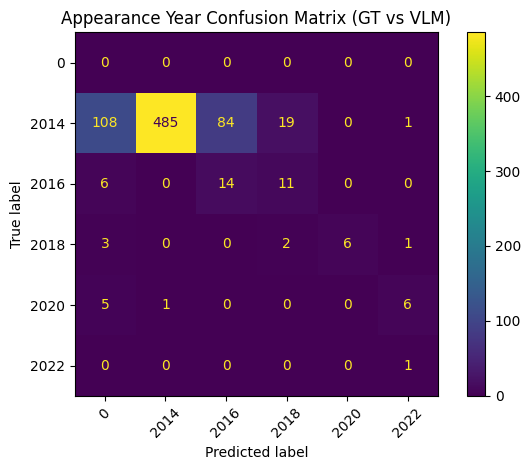

In [13]:
y_true = merged["appearance_year_gt"]
y_pred = merged["appearance_year_pred"]

labels = sorted(set(y_true) | set(y_pred))

cm = confusion_matrix(y_true, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)

disp.plot(xticks_rotation=45)
plt.title("Appearance Year Confusion Matrix (GT vs VLM)")
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

gt_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/temporal-analysis/images_753_with_Year_Categories.csv"

gt = pd.read_csv(gt_path)

# ensure numeric
gt["appearance_year"] = (
    pd.to_numeric(gt["appearance_year"], errors="coerce")
    .fillna(0)
    .astype(int)
)

# year-wise count
year_counts = (
    gt["appearance_year"]
    .value_counts()
    .sort_index()
)

print(year_counts)

2014    697
2016     31
2018     12
2020     12
2022      1
Name: appearance_year, dtype: int64
